In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow.keras

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten

In [5]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
#Input Sequence
timeseries = pd.read_csv("archive/infy_stock.csv")

In [7]:
timeseries.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
5,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920
6,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004
7,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702
8,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295
9,2015-01-14,INFY,EQ,2088.90,2098.50,2133.00,2092.60,2129.00,2128.65,2110.88,2480315,5.235638e+14,53263,1832958,0.7390


In [8]:
timeseries_data = timeseries['Close']

In [9]:
timeseries_data = np.array(timeseries_data)

In [10]:
#number of time steps
n_steps = 3

In [11]:
#split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [12]:
X.shape

(245, 3)

In [13]:
print(X), print(y)

[[1974.4  2013.2  1995.9 ]
 [2013.2  1995.9  1954.2 ]
 [1995.9  1954.2  1963.55]
 [1954.2  1963.55 1973.45]
 [1963.55 1973.45 2074.45]
 [1973.45 2074.45 2115.95]
 [2074.45 2115.95 2088.9 ]
 [2115.95 2088.9  2128.65]
 [2088.9  2128.65 2134.25]
 [2128.65 2134.25 2118.3 ]
 [2134.25 2118.3  2102.5 ]
 [2118.3  2102.5  2124.2 ]
 [2102.5  2124.2  2169.9 ]
 [2124.2  2169.9  2196.45]
 [2169.9  2196.45 2215.05]
 [2196.45 2215.05 2136.5 ]
 [2215.05 2136.5  2144.55]
 [2136.5  2144.55 2145.5 ]
 [2144.55 2145.5  2141.9 ]
 [2145.5  2141.9  2136.85]
 [2141.9  2136.85 2120.9 ]
 [2136.85 2120.9  2142.85]
 [2120.9  2142.85 2193.8 ]
 [2142.85 2193.8  2230.5 ]
 [2193.8  2230.5  2248.9 ]
 [2230.5  2248.9  2278.3 ]
 [2248.9  2278.3  2284.85]
 [2278.3  2284.85 2311.2 ]
 [2284.85 2311.2  2296.1 ]
 [2311.2  2296.1  2278.75]
 [2296.1  2278.75 2296.5 ]
 [2278.75 2296.5  2324.7 ]
 [2296.5  2324.7  2283.1 ]
 [2324.7  2283.1  2265.6 ]
 [2283.1  2265.6  2272.8 ]
 [2265.6  2272.8  2317.6 ]
 [2272.8  2317.6  2258.1 ]
 

(None, None)

In [14]:
n_features = 1

In [15]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [16]:
X.shape

(245, 3, 1)

### Building LSTM Model

In [17]:
#define model
model = Sequential()

In [18]:
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape = (n_steps, n_features)))

In [19]:
model.add(LSTM(50, activation='relu'))

In [20]:
model.add(Dense(1))

In [21]:
model.compile(optimizer = 'adam', loss = 'mse')

In [22]:
model.fit(X,y, epochs = 300, verbose=1)

Train on 245 samples
Epoch 1/300
245/245 [==============================] - 3s 14ms/sample - loss: 1975110.0622
Epoch 2/300
245/245 [==============================] - 0s 221us/sample - loss: 1463247.6842
Epoch 3/300
245/245 [==============================] - 0s 208us/sample - loss: 1122908.1411
Epoch 4/300
245/245 [==============================] - 0s 216us/sample - loss: 678432.9989
Epoch 5/300
245/245 [==============================] - 0s 212us/sample - loss: 231199.4441
Epoch 6/300
245/245 [==============================] - 0s 208us/sample - loss: 20212.8015
Epoch 7/300
245/245 [==============================] - 0s 221us/sample - loss: 9198.7486
Epoch 8/300
245/245 [==============================] - 0s 204us/sample - loss: 8435.8923
Epoch 9/300
245/245 [==============================] - 0s 196us/sample - loss: 7090.1251
Epoch 10/300
245/245 [==============================] - 0s 216us/sample - loss: 6199.7310
Epoch 11/300
245/245 [==============================] - 0s 221us/sample - l

245/245 [==============================] - 0s 200us/sample - loss: 5403.7880
Epoch 92/300
245/245 [==============================] - 0s 200us/sample - loss: 5436.4934
Epoch 93/300
245/245 [==============================] - 0s 200us/sample - loss: 5509.2404
Epoch 94/300
245/245 [==============================] - 0s 200us/sample - loss: 5427.9366
Epoch 95/300
245/245 [==============================] - 0s 196us/sample - loss: 5515.4293
Epoch 96/300
245/245 [==============================] - 0s 192us/sample - loss: 5381.9450
Epoch 97/300
245/245 [==============================] - 0s 196us/sample - loss: 5557.4787
Epoch 98/300
245/245 [==============================] - 0s 196us/sample - loss: 5559.0124
Epoch 99/300
245/245 [==============================] - 0s 196us/sample - loss: 5383.8325
Epoch 100/300
245/245 [==============================] - 0s 196us/sample - loss: 5385.3639
Epoch 101/300
245/245 [==============================] - 0s 196us/sample - loss: 5426.5303
Epoch 102/300
245/245

245/245 [==============================] - 0s 192us/sample - loss: 5709.0526
Epoch 182/300
245/245 [==============================] - 0s 196us/sample - loss: 5458.1686
Epoch 183/300
245/245 [==============================] - 0s 196us/sample - loss: 5341.8101
Epoch 184/300
245/245 [==============================] - 0s 192us/sample - loss: 5376.7113
Epoch 185/300
245/245 [==============================] - 0s 192us/sample - loss: 5491.8416
Epoch 186/300
245/245 [==============================] - 0s 192us/sample - loss: 5470.2606
Epoch 187/300
245/245 [==============================] - 0s 188us/sample - loss: 5479.8010
Epoch 188/300
245/245 [==============================] - 0s 192us/sample - loss: 5540.1320
Epoch 189/300
245/245 [==============================] - 0s 196us/sample - loss: 5481.9484
Epoch 190/300
245/245 [==============================] - 0s 196us/sample - loss: 5388.5490
Epoch 191/300
245/245 [==============================] - 0s 200us/sample - loss: 5546.9464
Epoch 192/300

245/245 [==============================] - 0s 196us/sample - loss: 5535.8684
Epoch 272/300
245/245 [==============================] - 0s 192us/sample - loss: 5468.2071
Epoch 273/300
245/245 [==============================] - 0s 192us/sample - loss: 5365.8734
Epoch 274/300
245/245 [==============================] - 0s 196us/sample - loss: 5435.1717
Epoch 275/300
245/245 [==============================] - 0s 200us/sample - loss: 5507.3805
Epoch 276/300
245/245 [==============================] - 0s 192us/sample - loss: 5413.2602
Epoch 277/300
245/245 [==============================] - 0s 196us/sample - loss: 5410.7009
Epoch 278/300
245/245 [==============================] - 0s 192us/sample - loss: 5646.2948
Epoch 279/300
245/245 [==============================] - 0s 196us/sample - loss: 5638.7683
Epoch 280/300
245/245 [==============================] - 0s 196us/sample - loss: 5478.9529
Epoch 281/300
245/245 [==============================] - 0s 196us/sample - loss: 5512.7090
Epoch 282/300

### Predicting for next 30 days

In [23]:
x_input = timeseries_data[-3:]
x_input = np.array(x_input)
x_input

array([1104.7, 1086.3, 1105.4])

In [24]:
temp_input=list(x_input)

In [25]:
lst_output = []

In [26]:
i = 0

In [27]:
while(i<100):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("Day {} input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("Day {} output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

[1105.1404]
Day 1 input [1086.3        1105.4        1105.14038086]
Day 1 output [[1103.856]]
Day 2 input [1105.4        1105.14038086 1103.85595703]
Day 2 output [[1111.5153]]
Day 3 input [1105.1404 1103.856  1111.5153]
Day 3 output [[1112.7926]]
Day 4 input [1103.856  1111.5153 1112.7926]
Day 4 output [[1115.1898]]
Day 5 input [1111.5153 1112.7926 1115.1898]
Day 5 output [[1119.434]]
Day 6 input [1112.7926 1115.1898 1119.434 ]
Day 6 output [[1121.8107]]
Day 7 input [1115.1898 1119.434  1121.8107]
Day 7 output [[1124.8502]]
Day 8 input [1119.434  1121.8107 1124.8502]
Day 8 output [[1128.1847]]
Day 9 input [1121.8107 1124.8502 1128.1847]
Day 9 output [[1131.0298]]
Day 10 input [1124.8502 1128.1847 1131.0298]
Day 10 output [[1134.1394]]
Day 11 input [1128.1847 1131.0298 1134.1394]
Day 11 output [[1137.2678]]
Day 12 input [1131.0298 1134.1394 1137.2678]
Day 12 output [[1140.2856]]
Day 13 input [1134.1394 1137.2678 1140.2856]
Day 13 output [[1143.395]]
Day 14 input [1137.2678 1140.2856 11

In [28]:
print(lst_output)

[1105.1404, 1103.856, 1111.5153, 1112.7926, 1115.1898, 1119.434, 1121.8107, 1124.8502, 1128.1847, 1131.0298, 1134.1394, 1137.2678, 1140.2856, 1143.395, 1146.4962, 1149.5803, 1152.696, 1155.8102, 1158.9275, 1162.0585, 1165.1931, 1168.3348, 1171.485, 1174.6415, 1177.8052, 1180.9766, 1184.1548, 1187.3406, 1190.5333, 1193.7338, 1196.9414, 1200.1562, 1203.3788, 1206.6086, 1209.8458, 1213.0907, 1216.343, 1219.6027, 1222.8701, 1226.145, 1229.4276, 1232.7178, 1236.0156, 1239.321, 1242.6343, 1245.9552, 1249.2838, 1252.6204, 1255.9646, 1259.3168, 1262.6768, 1266.0447, 1269.4203, 1272.804, 1276.1956, 1279.5952, 1283.0027, 1286.4183, 1289.842, 1293.2737, 1296.7137, 1300.1617, 1303.6178, 1307.082, 1310.5546, 1314.0353, 1317.5243, 1321.0215, 1324.5271, 1328.0409, 1331.5631, 1335.0938, 1338.6328, 1342.1802, 1345.7361, 1349.3003, 1352.8732, 1356.4542, 1360.0442, 1363.6425, 1367.2495, 1370.8654, 1374.4894, 1378.1224, 1381.764, 1385.4142, 1389.0734, 1392.7411, 1396.4177, 1400.103, 1403.7974, 1407.5006, 

### Visualizing Data

In [29]:
import matplotlib.pyplot as plt

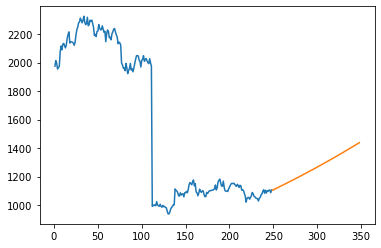

In [31]:
day_new = np.arange(1, len(timeseries_data)+1)
day_prep = np.arange(len(timeseries_data)+1, len(timeseries_data)+101)
plt.plot(day_new, timeseries_data)
plt.plot(day_prep, lst_output)